%%html
<style>
table {float:left}
</style>

# Statistics Hypothesis Testing.

## Overview

1. [Hypothesis testing](#1)<br>
1.1. [Test for the mean. Population variance known.](#11)<br>
1.2. [Test for the mean. Population variance unknown.](#12)<br>
1.3. [Test the mean. Dependent Samples.](#13)<br>
1.4. [Test for two means. Independent samples, variance known.](#14)<br>
1.5. [Testing of two means. Independent samples, variances unknown but assumed to be equal.](#15)<br>
2. [Practical Example. Hypothesis Testing.](#2)<br>
2.1. [Global gender pay gap hypothesis testing.](#21)<br>
2.2. [Global gender pay gap excl. outliers hypothesis testing.](#22)<br>
2.3. [Gender pay gap in IT department excl. outliers hypothesis testing.](#23)<br>

In [2]:
# importing packages
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import pandas as pd 
import seaborn as sns
import numpy as np
import math
import warnings
from scipy import stats
warnings.filterwarnings("ignore")
sns.set(style = 'whitegrid')
%matplotlib inline

***
## <a class="anchor" id="1">Part 1: Hypothesis testing</a>

| Word |  | Definition |
| :- | :-: | :- |
| hypothesis | - | Loosely, a hypothesis is 'an idea that can be tested' |
| hypothesis test | - | A test that is conducted in order to verify if a hypothesis is true or false. |
| null hypothesis | - | The null hypothesis is the one to be tested. Whenever we are conducting a test, we are trying to reject the null hypothesis. |
| alternative hypothesis | - | The alternative hypothesis is the opposite of the null. It is usually the opinion of the researcher, as he is trying to reject the null hypothesis and thus accept the alternative one. |
| to accept a hypothesis | - | The statistical evidence shows that the hypothesis is likely to be true. |
| to reject a hypothesis | - | The statistical evidence shows that the hypothesis is likely to be false. |
| one-tailed (one-sided) test | - | Tests which determine if a value is lower (or equal) or higher (or equal) to a certain value are one-sided. This is because they can only be rejected on one side. |
| two-tailed (two-sided) test | - | Tests which determine if a value is equal (or different) to a certain value are two-sided. This is because they can be rejected on two sides - if the parameter is too big or too small. |
| significance level | - | The probability of rejecting the null hypothesis, if it is true. Denoted α. You choose the significance level. All else equal, the lower the level, the better the test. |
| rejection region | - | The part of the distribution, for which we would reject the null hypothesis. |
| type I error (false positive) | - | This error consists of rejecting a null hypothesis that is true. The probability of committing it is α, the significance level. |
| type II error (false negative) | - | This error consists of accepting a null hypothesis that is false. The probability of committing it is β. |
| power of the test | - | Probability of rejecting a null hypothesis that is false (the researcher's goal). Denoted by 1- β. |
| z-score | - | The standardized variable associated with the dataset we are testing. It is observed in the table with an α equal to the level of significance of the test. |
| μ0 | - | The hypothesized population mean. |
| p-value | - | The smallest level of significance at which we can still reject the null hypothesis given the observed sample statistic. |
| email open rate | - | A measure of how many people on an email list actually open the emails they have received. |


### Equations
| Name | Equation | Explanation |
| :- | :- | :- |
| Z-score | Z = x̄ - H0 / σ/ sqrt(n)  | sample mean minus the value from null hypothesis divided by the standard error |
| p-value one sided | p = 1-number from the table  | 1 - zv value from z score table |
| p-value two sided | p = (1-number from the table)*2  | 1 - zv value from z score table multiplied by two |

### <a class="anchor" id="11">Part 1.1: Test for the mean. Population variance known.</a>


In [3]:
'''
Test for the mean. Population variance known
Title: Data scientist salary
Background: Is there statistical evidence that mean  Data Scientist salary is $113,000
TODO: 
1. State the hypotheses.
Null hypothesis is to assume that mean ds salary = 113k
- H0: u0 = 113000
- H1: u0 != 113000
Two sided hypothesis test
2. Determine a significance level to use for the hypothesis.
Significance level = .05
3. Find the test statistic.
4. Reject or fail to reject the null hypothesis.
5. Interpret the results. 
'''
# stating null hypothesis
H0 = 113000
print('Null hypothesis:',H0)
# determining a significance level
alpha = .05
print('Significance level:',alpha)

Null hypothesis: 113000
Significance level: 0.05


In [4]:
# creating example dataframe with ds salaries
df = pd.DataFrame({'Salaries': [117313,104002,113038,101936,84560,113136,80740,100536,105052,87201,91986,94868,90745,102848,85927,112276,108637,96818,92307,114564,109714,108833,115295,89279,81720,89344,114426,90410,95118,113382]})
df.head()

,Salaries
0,117313
1,104002
2,113038
3,101936
4,84560


In [5]:
# calculating sample mean
df_mean = df['Salaries'].mean()
print('Sample mean:',df_mean)
# Population standard deviation
df_std = 15000 # population std has been given
print('Population standard deviation:',df_std)
# calculating sample size
n = len(df['Salaries'])
print('Sample size:',n)
# calculating standard error
df_se = df_std/math.sqrt(n)
print('Sample standard error:',df_se)

Sample mean: 100200.36666666667
Population standard deviation: 15000
Sample size: 30
Sample standard error: 2738.6127875258308


In [6]:
# finding the test score
Z_score = abs((df_mean - H0)/df_se)
print('Z-score: ', Z_score)

Z-score:  4.673765269641137


In [7]:
# calculating critical value
z_critical = abs(round(stats.norm.ppf(alpha),2))
print('Z-critical value:',z_critical)

Z-critical value: 1.64


In [9]:
# rejecting or failing to reject null hypothesis and iterpreting the results
if Z_score < z_critical:
    print('Logic: If the absolute value of Z-score is LOWER than critical value z then we cannot reject the Null Hypothesis.')
    print('Comparison: Absolute value of Z-score: {} is lower than critical value of t: {}'.format(Z_score,z_critical))
    print('Interpretation: At the 5% significance level we can say that the average Data Scientist salary = 113k.')
    print('Final Decision: Do not reject null hypothesis!')
else:
    print('Logic: If the absolute value of Z-score is HIGHER than critical value z then we recejct the null hypothesis!')
    print('Comparison: Absolute value of Z-score: {} is higher than critical value of z: {}'.format(Z_score,z_critical))
    print('Interpretation: At the 5% significance level we can say that the average Data Scientist salary != 113k.')
    print('Final Decision: Reject null hypothesis!')

Logic: If the absolute value of Z-score is HIGHER than critical value z then we recejct the null hypothesis!
Comparison: Absolute value of Z-score: 4.673765269641137 is higher than critical value of z: 1.64
Interpretation: At the 5% significance level we can say that the average Data Scientist salary != 113k.
Final Decision: Reject null hypothesis!


In [10]:
# calculating p-value from Z-score for two tailed test
p_value = round(stats.norm.sf(abs(Z_score)),3)*2
print('p-value:',p_value)

p-value: 0.0


In [11]:
# rejecting or failing to reject null hypothesis and iterpreting the results
if p_value > alpha:
    print('Logic: If the absolute value of p-value is HIGHER than significance level, we cannot reject the Null Hypothesis.')
    print('Comparison: Absolute value of p-value: {} is HIGHER than significance level: {}'.format(p_value,alpha))
    print('Interpretation: At the 5% significance level we can say that the average Data Scientist salary equals to 113k.')
    print('Final Decision: Do not reject null hypothesis!')
else:
    print('Logic: If the absolute value of p-value is LOWER than significance level, we reject the Null Hypothesis.')
    print('Comparison: Absolute value of p-value: {} is LOWER than significance level: {}'.format(p_value,alpha))
    print('Interpretation: At the 5% significance level we can say that the average Data Scientist salary different than 113k.')
    print('Final Decision: Reject null hypothesis!')

Logic: If the absolute value of p-value is LOWER than significance level, we reject the Null Hypothesis.
Comparison: Absolute value of p-value: 0.0 is LOWER than significance level: 0.05
Interpretation: At the 5% significance level we can say that the average Data Scientist salary different than 113k.
Final Decision: Reject null hypothesis!


### <a class="anchor" id="12">Part 1.2: Test for the mean. Population variance unknown. </a>

### Equations
| Name | Equation | Explanation |
| :- | :- | :- |
| T-score | T = x̄ - u0 / σ/ sqrt(n)  | sample mean minus the value from null hypothesis divided by the standard error |

In [12]:
'''
Test for the mean. Population variance unknown
Title: Email spying
Background: Try to find out if competitors mean open rate of email campaigns is smaller or significantly larger than 40%. 
TODO: 
1. State the hypotheses.
Null hypothesis is to assume that mean open rate = .4
- H0: u0 <= .4
- H1: u0 > .4
One sided hypothesis test
2. Determine a significance level to use for the hypothesis.
Significance level = .05
3. Find the test statistic.
4. Reject or fail to reject the null hypothesis.
5. Interpret the results. 
'''
# stating null hypothesis
H0 = .4
print('Null hypothesis:',H0)
# determining a significance level
alpha = .05
print('Significance level:',alpha)

Null hypothesis: 0.4
Significance level: 0.05


In [13]:
# creating dataframe with open rate of the email campaign
df = pd.DataFrame({'Open_Rate': [0.26,0.23,0.42,0.49,0.23,0.59,0.29,0.29,0.57,0.4]})
df.head()

,Open_Rate
0,0.26
1,0.23
2,0.42
3,0.49
4,0.23


In [14]:
# sample size
n = len(df['Open_Rate'])
print('Sample size:',n)
# degrees of freedom
dof = n-1
print('Degrees of freedom:',dof)

Sample size: 10
Degrees of freedom: 9


In [15]:
# sample mean
df_mean = df['Open_Rate'].mean()
print('Sample Mean:',df_mean)
# calculating sample standard deviation
df_std = df['Open_Rate'].std()
print('Sample Std:', df_std)
# calculating standard error
df_sem = df['Open_Rate'].sem()
print('Standard Error:', df_sem)

Sample Mean: 0.37699999999999995
Sample Std: 0.13736002976767941
Standard Error: 0.04343705535343962


In [16]:
# calculating t-score
T_score = abs((df_mean-H0)/df_sem)
print('T-score:',T_score)

T-score: 0.5295018231059438


In [17]:
# calculating critical value
t_critical = abs(stats.t.ppf(alpha, dof))
print('t critical', t_critical)

t critical 1.8331129326536337


In [18]:
# calculating p-value from T-score for one sided test
p_value = round(stats.t.sf(abs(T_score), dof),3)
print('p-value:',p_value)

p-value: 0.305


In [19]:
# rejecting or failing to reject null hypothesis and iterpreting the results
if p_value > alpha:
    print('Logic: If the absolute value of p-value is HIGHER than significance level, we cannot reject the Null Hypothesis.')
    print('Comparison: Absolute value of p-value: {} is HIGHER than significance level: {}'.format(p_value,alpha))
    print('Interpretation: At the 5% significance level we can say that, our competitor\'s open rate is not significantly different from 40%.')
    print('Final Decision: Do not reject null hypothesis!')
else:
    print('Logic: If the absolute value of p-value is LOWER than significance level, we reject the Null Hypothesis.')
    print('Comparison: Absolute value of p-value: {} is LOWER than significance level: {}'.format(p_value,alpha))
    print('Interpretation: At the 5% significance level we can say that, our competitor\'s open rate is significantly different from 40%.')
    print('Final Decision: Reject null hypothesis!')

Logic: If the absolute value of p-value is HIGHER than significance level, we cannot reject the Null Hypothesis.
Comparison: Absolute value of p-value: 0.305 is HIGHER than significance level: 0.05
Interpretation: At the 5% significance level we can say that, our competitor's open rate is not significantly different from 40%.
Final Decision: Do not reject null hypothesis!


### <a class="anchor" id="13">Part 1.3: Test the mean. Dependent Samples. </a>

In [20]:
'''
Test the mean. Dependent Samples
Title: Magnesium levels example
Background: Some guy on the internet designed a weight-loss program. You are wondering if it is working. You are given a sample of some people who did the program.
TODO: 
1. State the hypotheses.
Null hypothesis is to assume that before drug mean is larger or equals to mean after taking the drug.
- H0: ub >= ua
- H1: ub < ua
Therefore:
-H0: ub-ua >= 0
-H1: ub-ua < 0 
One sided hypothesis test
2. Determine a significance level to use for the hypothesis.
Significance level = .05
3. Find the test statistic.
4. Reject or fail to reject the null hypothesis.
5. Interpret the results. 
'''
# stating null hypothesis
H0 = 0
print('Null hypothesis:',H0)
# determining a significance level
alpha = .05
print('Significance level:',alpha)
               

Null hypothesis: 0
Significance level: 0.05


In [21]:
# Task 3
df = pd.DataFrame({'Before': [2,1.4,1.3,1.1,1.8,1.6,1.5,0.7,0.9,1.5]
                  ,'After': [1.7,1.7,1.8,1.3,1.7,1.5,1.6,1.7,1.7,2.4]})
df.head()   

,Before,After
0,2.0,1.7
1,1.4,1.7
2,1.3,1.8
3,1.1,1.3
4,1.8,1.7


In [22]:
# calulcating difference between before and after the drug
df['Diff_B_A'] = df['Before'] - df['After']
df.head()

,Before,After,Diff_B_A
0,2.0,1.7,0.3
1,1.4,1.7,-0.3
2,1.3,1.8,-0.5
3,1.1,1.3,-0.2
4,1.8,1.7,0.1


In [23]:
# sample size
n = len(df['Diff_B_A'])
print('Sample size: ', n)
# degrees of freedom
dof = n-1
print('Degrees of freedom: ', dof)

Sample size:  10
Degrees of freedom:  9


In [24]:
# sample mean of differences
df_mean = round(df['Diff_B_A'].mean(),3)
print('Sample Mean: ',df_mean)
# calculating sample standard deviation of the differences
df_std = round(df['Diff_B_A'].std(),3)
print('Sample Std: ', df_std)
# calculating standard error
df_sem = round(df['Diff_B_A'].sem(),3)
print('Standard Error: ', df_sem)

Sample Mean:  -0.33
Sample Std:  0.455
Standard Error:  0.144


In [25]:
# T-score sample mean - null hypothesis divided by the standard error
T_score = abs((df_mean - H0)/df_sem)
print('T-score:',T_score)

T-score: 2.291666666666667


In [26]:
# checking critical value from t students table for dof = 9 and alpha .05
t_critical = abs(stats.t.ppf(alpha, dof))# 1.833
print('t critical = ', t_critical)

t critical =  1.8331129326536337


In [27]:
# calculating p-value from t-score for one sided test
p_value = round(stats.t.sf(abs(T_score), dof),3)
print('P-value:',p_value)

P-value: 0.024


In [28]:
# rejecting or failing to reject null hypothesis and iterpreting the results
if p_value > alpha:
    print('Logic: If the absolute value of p-value is HIGHER than significance level, we cannot reject the Null Hypothesis.')
    print('Comparison: Absolute value of p-value: {} is HIGHER than significance level: {}'.format(p_value,alpha))
    print('Interpretation: At the 5% significance level we cannot say that the drug works successfully.')
    print('Final Decision: Do not reject null hypothesis!')
else:
    print('Logic: If the absolute value of p-value is LOWER than significance level, we reject the Null Hypothesis.')
    print('Comparison: Absolute value of p-value: {} is LOWER than significance level: {}'.format(p_value,alpha))
    print('Interpretation: At the 5% significance level we can say that the drug works successfully.')
    print('Final Decision: Reject null hypothesis!')

Logic: If the absolute value of p-value is LOWER than significance level, we reject the Null Hypothesis.
Comparison: Absolute value of p-value: 0.024 is LOWER than significance level: 0.05
Interpretation: At the 5% significance level we can say that the drug works successfully.
Final Decision: Reject null hypothesis!


### <a class="anchor" id="14">Part 1.4: Test for two means. Independent samples, variance known. </a>

In [29]:
'''
Test for two means. Independent samples, population variance known
Title: New Cleaning Detergent
Background: Ajax releases a new dish detergent, called Extreme Ajax+, which they advertise to be able to clean many more dishes with a single bottle.
You want to see if that is true and have bought 25 bottles of Extreme Ajax+ and 25 bottles of Ajax and collected data on how many dirty dishes you can wash with a single bottle.
(Population variance is assumed to be known.)
TODO: 
1. State the hypotheses.
Null hypothesis is to assume that there is no significant difference between Ajax Extreme and Ajax.
- H0: ub >= ua
- H1: ub < ua
Therefore:
-H0: ub-ua >= 0
-H1: ub-ua < 0 
One sided hypothesis test
2. Determine a significance level to use for the hypothesis.
Significance level = .05
3. Find the test statistic.
4. Reject or fail to reject the null hypothesis.
5. Interpret the results. 
'''
# defying null hypothesis
H0 = 0
print('Null hypothesis:',H0)
# significance level
alpha = .05
print('Significance level:',alpha)

Null hypothesis: 0
Significance level: 0.05


In [30]:
# creating dataframe
df = pd.DataFrame({'Name': ['Size','Mean','Variance']
                  ,'Extreme_Ajax+': [25,115,625]
                  ,'Ajax': [25,100,400]})
df.head()

,Name,Extreme_Ajax+,Ajax
0,Size,25,25
1,Mean,115,100
2,Variance,625,400


In [31]:
# sample sizes
n_ajax_extreme = df.iloc[0,1]
print('Sample size Ajax+:',n_ajax_extreme)
n_ajax = df.iloc[0,2]
print('Sample size Ajax:',n_ajax)

Sample size Ajax+: 25
Sample size Ajax: 25


In [32]:
# calculating mean difference 
mean_ajax_extreme = df.iloc[1,1]
print('Mean Ajax Extreme:',mean_ajax_extreme)
mean_ajax = df.iloc[1,2]
print('Mean Ajax:',mean_ajax)
mean_diff = mean_ajax_extreme - mean_ajax
print('Mean difference:',mean_diff)
# calculating standard error
var_ajax_extreme = df.iloc[2,1]
print('Variance Ajax Extreme:',var_ajax_extreme)
var_ajax = df.iloc[2,2]
print('Variance Ajax:',var_ajax)
sem_diff = math.sqrt((var_ajax_extreme/n_ajax_extreme) + (var_ajax/n_ajax))
print('Standard error:',sem_diff)

Mean Ajax Extreme: 115
Mean Ajax: 100
Mean difference: 15
Variance Ajax Extreme: 625
Variance Ajax: 400
Standard error: 6.4031242374328485


In [35]:
# calculating z-score
Z_score = round((mean_diff- H0)/sem_diff,3)
print('Z-score:',Z_score)

Z-score: 2.343


In [36]:
# calculating p-value from z-score for one sided test
p_value = round(stats.norm.sf(abs(Z_score)),3)
print('P-value:',p_value)

P-value: 0.01


In [37]:
# rejecting or failing to reject null hypothesis and iterpreting the results
if p_value > alpha:
    print('Logic: If the absolute value of p-value is HIGHER than significance level, we cannot reject the Null Hypothesis.')
    print('Comparison: Absolute value of p-value: {} is HIGHER than significance level: {}'.format(p_value,alpha))
    print('Interpretation: At the 5% significance level we can say that the Ajax Extreme + is not a significantly better product.')
    print('Final Decision: Do not reject null hypothesis!')
else:
    print('Logic: If the absolute value of p-value is LOWER than significance level, we reject the Null Hypothesis.')
    print('Comparison: Absolute value of p-value: {} is LOWER than significance level: {}'.format(p_value,alpha))
    print('Interpretation: At the 5% significance level we can say that the Ajax Extreme + is a significantly better product.')
    print('Final Decision: Reject null hypothesis!')

Logic: If the absolute value of p-value is LOWER than significance level, we reject the Null Hypothesis.
Comparison: Absolute value of p-value: 0.01 is LOWER than significance level: 0.05
Interpretation: At the 5% significance level we can say that the Ajax Extreme + is a significantly better product.
Final Decision: Reject null hypothesis!


### <a class="anchor" id="15">Part 1.5: Testing of two means. Independent samples, variances unknown but assumed to be equal. </a>

In [38]:
'''
Testing of two means. Independent samples, variances unknown but assumed to be equal
Title: Shopping
Background: You have data on the amount of times people click on a pop-up add on 24 Mondays and 21 Saturdays on an e-learning platform for several years. The samples are drawn independently. Statistically speaking, is there strong evidence that the number of clicks the add records on Mondays is higher than the number of clicks on Saturdays?	
TODO: 
1. State the hypotheses.
Null hypothesis is to assume that there is a higher number of clicks on Monday than on Saturday.
- H0: um <= us
- H1: um > us
Therefore:
-H0: um-us <= 0
-H1: um-us > 0 
One sided hypothesis test
2. Determine a significance level to use for the hypothesis.
Significance level = .05
3. Find the test statistic.
4. Reject or fail to reject the null hypothesis.
5. Interpret the results. 
'''
# defying null hypothesis
H0 = 0
print('Null hypothesis:',H0)
# significance level
alpha = .05
print('Significance level:',alpha)      

Null hypothesis: 0
Significance level: 0.05


In [39]:
# creating dataframe
df = pd.DataFrame({'Name': ['Size','Mean','Std. deviation']
                  ,'Monday': [24,1078,633]
                  ,'Saturday': [21,908,469.8]})
df.head()  

,Name,Monday,Saturday
0,Size,24,21.0
1,Mean,1078,908.0
2,Std. deviation,633,469.8


In [40]:
# sample sizes
n_mon = df.iloc[0,1]
print('Sample size Monday:',n_mon)
n_sat = df.iloc[0,2]
print('Sample size Saturday:',n_sat)
# degrees of freedom
dof_mon = n_mon-1
print('Degrees of freedom Monday:',dof_mon)
dof_sat = n_sat-1
print('Degrees of freedom Saturday:',dof_sat)
dof = dof_mon+dof_sat
print('Degrees of freedom:',dof)

Sample size Monday: 24
Sample size Saturday: 21.0
Degrees of freedom Monday: 23
Degrees of freedom Saturday: 20.0
Degrees of freedom: 43.0


In [41]:
# mean difference
mean_mon = df.iloc[1,1]
print('Mean Monday:',mean_mon)
mean_sat = df.iloc[1,2]
print('Mean Saturday:',mean_sat)
mean_diff = mean_mon-mean_sat
print('Mean difference:',mean_diff)
# standard deviations
std_mon = df.iloc[2,1]
print('Std. Monday:',std_mon)
std_sat = df.iloc[2,2]
print('Std. Saturday:',std_sat)
# variances
var_mon = std_mon**2
print('Var. Saturday:',var_mon)
var_sat = std_sat**2
print('Var. Saturday:',var_sat)
# pooled variance
pooled_variance = ((var_mon*dof_mon)+(var_sat*dof_sat))/dof
print('Pooled Variance:',pooled_variance)
# standard error
pooled_sem = math.sqrt((pooled_variance/n_mon)+(pooled_variance/n_sat))
print('Pooled standard error:',pooled_sem)


Mean Monday: 1078
Mean Saturday: 908.0
Mean difference: 170.0
Std. Monday: 633
Std. Saturday: 469.8
Var. Saturday: 400689
Var. Saturday: 220712.04
Pooled Variance: 316978.78604651167
Pooled standard error: 168.23102367156125


In [44]:
# calculating T-score
T_score = round((mean_diff-H0)/pooled_sem,3)
print('T-score:',T_score)

T-score: 1.011


In [45]:
# calculating p-value from t-score for one sided test
p_value = round(stats.t.sf(abs(T_score), dof),3)
print('P-value:',p_value)

P-value: 0.159


In [46]:
# rejecting or failing to reject null hypothesis and iterpreting the results
if p_value > alpha:
    print('Logic: If the absolute value of p-value is HIGHER than significance level, we cannot reject the Null Hypothesis.')
    print('Comparison: Absolute value of p-value: {} is HIGHER than significance level: {}'.format(p_value,alpha))
    print('Interpretation: At the 5% significance level we can say there is no reason to assume more people click on Mondays than on Saturdays.')
    print('Final Decision: Do not reject null hypothesis!')
else:
    print('Logic: If the absolute value of p-value is LOWER than significance level, we reject the Null Hypothesis.')
    print('Comparison: Absolute value of p-value: {} is LOWER than significance level: {}'.format(p_value,alpha))
    print('Interpretation: At the 5% significance level we can say that there is significantly more clicks on Mondays than on Saturdays.')
    print('Final Decision: Reject null hypothesis!')

Logic: If the absolute value of p-value is HIGHER than significance level, we cannot reject the Null Hypothesis.
Comparison: Absolute value of p-value: 0.159 is HIGHER than significance level: 0.05
Interpretation: At the 5% significance level we can say there is no reason to assume more people click on Mondays than on Saturdays.
Final Decision: Do not reject null hypothesis!


***
## <a class="anchor" id="2">Part 2: Practical Example. Hypothesis Testing </a>

In [47]:
# reading in the data
df = pd.read_csv('Data/Hypothesis_Testing_Paygap.csv')
df.head()

,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary
0,Bold,Caroline,63,Female,United States,White,7/2/2012,Executive Office,President & CEO,"$166,400.00"
1,Zamora,Jennifer,38,Female,United States,White,4/10/2010,IT/IS,CIO,"$135,200.00"
2,Houlihan,Debra,51,Female,United States,White,5/5/2014,Sales,Director of Sales,"$124,800.00"
3,Bramante,Elisa,34,Female,United States,Black or African American,1/5/2009,Production,Director of Operations,"$124,800.00"
4,Del Bosque,Keyla,38,Female,United States,Black or African American,1/9/2012,Software Engineering,Software Engineer,"$118,809.60"


### <a class="anchor" id="21">Part 2.1: Global gender pay gap hypothesis testing</a>

In [48]:
'''
Hypothesis testing for Spark Fortress
Title: Pay Gap Hypothesis testing (T test for independent variables)
Background: You are given the dataset with Spark's Fortress salaries. Try to find out if there is a Gender pay gap.
TODO:
1. State the hypotheses.
Null hypothesis is to assume that men and women salaries are equal
- H0: um = uf
- H1: um != uf
Therefore:
-H0: um-uf = 0
-H1: um-uf != 0 
Two sided hypothesis test
2. Determine a significance level to use for the hypothesis.
Significance level = .05
3. Find the test statistic.
4. Reject or fail to reject the null hypothesis.
5. Interpret the results. 
'''
# stating null hypothesis
H0 = 0
print('Null hypothesis:',H0)
# determining a significance level
alpha = .05
print('Significance level:',alpha)

Null hypothesis: 0
Significance level: 0.05


In [49]:
# data preparation on salary column
df['Salary'] = df['Salary'].str.replace('$','').str.replace(',','').astype(float)
df['Salary'].head()

0    166400.0
1    135200.0
2    124800.0
3    124800.0
4    118809.6
Name: Salary, dtype: float64

In [50]:
df['Salary'].describe()

count       174.000000
mean      68603.779310
std       34121.543021
min       29120.000000
25%       41600.000000
50%       52000.000000
75%      110240.000000
max      166400.000000
Name: Salary, dtype: float64

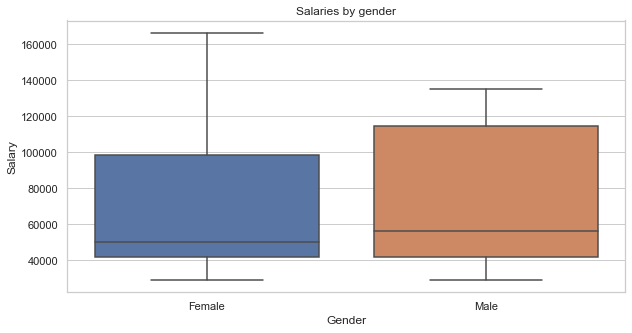

In [51]:
# checking for outliers
plt.figure(figsize = (10,5))
p = sns.boxplot(data = df
               ,y = 'Salary'
               ,x = 'Gender')
p.set_title('Salaries by gender')
plt.show()

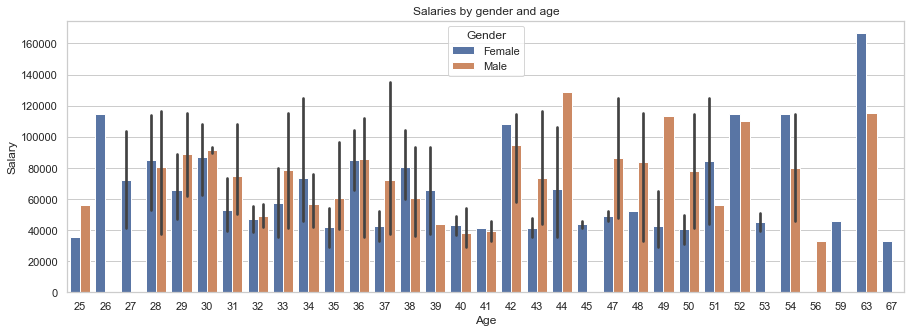

In [52]:
# checking for outliers
plt.figure(figsize = (15,5))
p = sns.barplot(data = df
               ,y = 'Salary'
               ,x = 'Age'
               ,hue = 'Gender')
p.set_title('Salaries by gender and age')
plt.show()

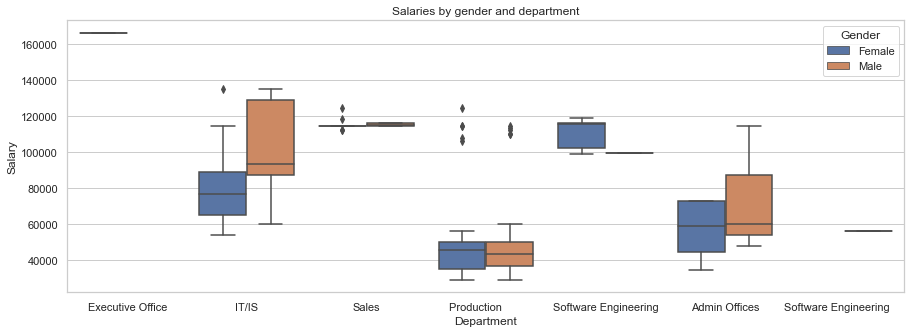

In [53]:
# checking for outliers
plt.figure(figsize = (15,5))
p = sns.boxplot(data = df
               ,y = 'Salary'
               ,x = 'Department'
               ,hue = 'Gender')
p.set_title('Salaries by gender and department')
plt.show()  

In [54]:
# sample sizes and degrees of freedom
n_female = df[df['Gender'] == 'Female'].shape[0]
print('Female sample size:',n_female)
n_male = df[df['Gender'] == 'Male'].shape[0]
print('Male sample size:',n_male)
dof_female = n_female - 1
print('Female degrees of freedom:',dof_female)
dof_male = n_male - 1
print('Male degrees of freedom:',dof_male)
dof = dof_female + dof_male
print('Degrees of freedom:',dof)

Female sample size: 98
Male sample size: 76
Female degrees of freedom: 97
Male degrees of freedom: 75
Degrees of freedom: 172


In [55]:
# calculating means and mean difference
mean_female = df[df['Gender'] == 'Female']['Salary'].mean()
print('Mean female salary:',mean_female)
mean_male = df[df['Gender'] == 'Male']['Salary'].mean()
print('Mean male salary:',mean_male)
mean_diff = mean_female-mean_male
print('Mean difference:',mean_diff)

Mean female salary: 65736.91428571429
Mean male salary: 72300.52631578948
Mean difference: -6563.612030075194


In [56]:
# calculating sample variances and pooled variance
var_female = df[df['Gender'] == 'Female']['Salary'].var()
print('Female salary variance:',var_female)
var_male = df[df['Gender'] == 'Male']['Salary'].var()
print('Male salary variance:',var_male)
var_pooled = (var_female*dof_female+var_male*dof_male)/dof
print('Pooled variance:',var_pooled)

Female salary variance: 1097618027.67835
Male salary variance: 1241431654.5630307
Pooled variance: 1160327458.0059724


In [57]:
# calculating pooled standard error
se_pooled = math.sqrt(var_female/n_female+var_male/n_male)
print('Standard error:',se_pooled)

Standard error: 5247.362288771914


In [58]:
# calculating T-score
T_score = abs((mean_diff-H0)/se_pooled)
print('T-score:',T_score)

T-score: 1.2508402639016818


In [59]:
# calculating p-value from t-score for two sided test
p_value = round(stats.t.sf(abs(T_score), dof),3)*2
print('P-value:',p_value)

P-value: 0.212


In [60]:
# rejecting or failing to reject null hypothesis and iterpreting the results
if p_value > alpha:
    print('Logic: If the absolute value of p-value is HIGHER than significance level, we cannot reject the Null Hypothesis.')
    print('Comparison: Absolute value of p-value: {} is HIGHER than significance level: {}'.format(p_value,alpha))
    print('Interpretation: At the 5% significance level we cannot say that there is gender pay gap at Spark Fortress.')
    print('Final Decision: Do not reject null hypothesis!')
else:
    print('Logic: If the absolute value of p-value is LOWER than significance level, we reject the Null Hypothesis.')
    print('Comparison: Absolute value of p-value: {} is LOWER than significance level: {}'.format(p_value,alpha))
    print('Interpretation: At the 5% significance level we can say that there is gender pay gap at Spark Fortress.')
    print('Final Decision: Reject null hypothesis!')

Logic: If the absolute value of p-value is HIGHER than significance level, we cannot reject the Null Hypothesis.
Comparison: Absolute value of p-value: 0.212 is HIGHER than significance level: 0.05
Interpretation: At the 5% significance level we cannot say that there is gender pay gap at Spark Fortress.
Final Decision: Do not reject null hypothesis!


### <a class="anchor" id="22">Part 2.2: Global gender pay gap excl. outliers hypothesis testing.</a>

In [64]:
# excluding outliers at .05 and .95 quantiles
lower = df['Salary'].quantile(0.05)
print('.05 salary quantile:',lower)
upper = df['Salary'].quantile(0.95)
print('.95 salary quantile:',upper)
df['Is_Outlier'] =  df['Salary'].apply(lambda x: 1 if x <= lower or x >= upper else 0)
df[['Salary','Is_Outlier']].head()

.05 salary quantile: 31200.0
.95 salary quantile: 118647.35999999999


,Salary,Is_Outlier
0,166400.0,1
1,135200.0,1
2,124800.0,1
3,124800.0,1
4,118809.6,1


In [65]:
# how many outliers are there
df['Is_Outlier'].value_counts()

0    155
1     19
Name: Is_Outlier, dtype: int64

In [66]:
# sample sizes and degrees of freedom
n_female = df[(df['Gender'] == 'Female')&(df['Is_Outlier'] == 0)].shape[0]
print('Female sample size:',n_female)
n_male = df[(df['Gender'] == 'Male')&(df['Is_Outlier'] == 0)].shape[0]
print('Male sample size:',n_male)
dof_female = n_female - 1
print('Female degrees of freedom:',dof_female)
dof_male = n_male - 1
print('Male degrees of freedom:',dof_male)
dof = dof_female + dof_male
print('Degrees of freedom:',dof)

Female sample size: 86
Male sample size: 69
Female degrees of freedom: 85
Male degrees of freedom: 68
Degrees of freedom: 153


In [67]:
# calculating means and mean difference
mean_female = df[(df['Gender'] == 'Female')&(df['Is_Outlier'] == 0)]['Salary'].mean()
print('Mean female salary:',mean_female)
mean_male = df[(df['Gender'] == 'Male')&(df['Is_Outlier'] == 0)]['Salary'].mean()
print('Mean male salary:',mean_male)
mean_diff = mean_female-mean_male
print('Mean difference:',mean_diff)

Mean female salary: 64627.53488372093
Mean male salary: 70652.17391304347
Mean difference: -6024.639029322541


In [68]:
# calculating sample variances and pooled variance
var_female = df[(df['Gender'] == 'Female')&(df['Is_Outlier'] == 0)]['Salary'].var()
print('Female salary variance:',var_female)
var_male = df[(df['Gender'] == 'Male')&(df['Is_Outlier'] == 0)]['Salary'].var()
print('Male salary variance:',var_male)
var_pooled = (var_female*dof_female+var_male*dof_male)/dof
print('Pooled variance:',var_pooled)

Female salary variance: 858420402.4841799
Male salary variance: 1078836151.282251
Pooled variance: 956382957.5055447


In [69]:
# calculating pooled standard error
se_pooled = math.sqrt(var_female/n_female+var_male/n_male)
print('Standard error:',se_pooled)

Standard error: 5061.317923954967


In [70]:
# calculating T-score
T_score = abs((mean_diff-H0)/se_pooled)
print('T-score:',T_score)

T-score: 1.1903300918537882


In [71]:
# calculating p-value from t-score for two sided test
p_value = round(stats.t.sf(abs(T_score), dof),3)*2
print('P-value:',p_value)

P-value: 0.236


In [72]:
# rejecting or failing to reject null hypothesis and iterpreting the results
if p_value > alpha:
    print('Logic: If the absolute value of p-value is HIGHER than significance level, we cannot reject the Null Hypothesis.')
    print('Comparison: Absolute value of p-value: {} is HIGHER than significance level: {}'.format(p_value,alpha))
    print('Interpretation: At the 5% significance level we cannot say that there is gender pay gap at Spark Fortress even with outliers being excluded.')
    print('Final Decision: Do not reject null hypothesis!')
else:
    print('Logic: If the absolute value of p-value is LOWER than significance level, we reject the Null Hypothesis.')
    print('Comparison: Absolute value of p-value: {} is LOWER than significance level: {}'.format(p_value,alpha))
    print('Interpretation: At the 5% significance level we can say that there is gender pay gap at Spark Fortress with outliers being excluded.')
    print('Final Decision: Reject null hypothesis!')

Logic: If the absolute value of p-value is HIGHER than significance level, we cannot reject the Null Hypothesis.
Comparison: Absolute value of p-value: 0.236 is HIGHER than significance level: 0.05
Interpretation: At the 5% significance level we cannot say that there is gender pay gap at Spark Fortress even with outliers being excluded.
Final Decision: Do not reject null hypothesis!


### <a class="anchor" id="23">Part 2.3: Gender pay gap in IT department excl. outliers hypothesis testing.</a>

In [73]:
# sample sizes and degrees of freedom
n_female = df[(df['Gender'] == 'Female')
             &(df['Is_Outlier'] == 0)
             &(df['Department'] == 'IT/IS')].shape[0]
print('Female sample size:',n_female)
n_male = df[(df['Gender'] == 'Male')
             &(df['Is_Outlier'] == 0)
             &(df['Department'] == 'IT/IS')].shape[0]
print('Male sample size:',n_male)
dof_female = n_female - 1
print('Female degrees of freedom:',dof_female)
dof_male = n_male - 1
print('Male degrees of freedom:',dof_male)
dof = dof_female + dof_male
print('Degrees of freedom:',dof)

Female sample size: 12
Male sample size: 9
Female degrees of freedom: 11
Male degrees of freedom: 8
Degrees of freedom: 19


In [74]:
# calculating means and mean difference
mean_female = df[(df['Gender'] == 'Female')
             &(df['Is_Outlier'] == 0)
             &(df['Department'] == 'IT/IS')]['Salary'].mean()
print('Mean female salary:',mean_female)
mean_male = df[(df['Gender'] == 'Male')
             &(df['Is_Outlier'] == 0)
             &(df['Department'] == 'IT/IS')]['Salary'].mean()
print('Mean male salary:',mean_male)
mean_diff = mean_female-mean_male
print('Mean difference:',mean_diff)

Mean female salary: 75883.59999999999
Mean male salary: 85277.68888888888
Mean difference: -9394.088888888888


In [75]:
# calculating sample variances and pooled variance
var_female = df[(df['Gender'] == 'Female')
             &(df['Is_Outlier'] == 0)
             &(df['Department'] == 'IT/IS')]['Salary'].var()
print('Female salary variance:',var_female)
var_male = df[(df['Gender'] == 'Male')
             &(df['Is_Outlier'] == 0)
             &(df['Department'] == 'IT/IS')]['Salary'].var()
print('Male salary variance:',var_male)
var_pooled = (var_female*dof_female+var_male*dof_male)/dof
print('Pooled variance:',var_pooled)

Female salary variance: 336181505.92
Male salary variance: 282935792.07111114
Pooled variance: 313762257.98362577


In [76]:
# calculating pooled standard error
se_pooled = math.sqrt(var_female/n_female+var_male/n_male)
print('Standard error:',se_pooled)

Standard error: 7710.540559743967


In [77]:
# calculating T-score
T_score = abs((mean_diff-H0)/se_pooled)
print('T-score:',T_score)

T-score: 1.218343748547874


In [78]:
# calculating p-value from t-score for two sided test
p_value = round(stats.t.sf(abs(T_score), dof),3)*2
print('P-value:',p_value)

P-value: 0.238


In [79]:
# rejecting or failing to reject null hypothesis and iterpreting the results
if p_value > alpha:
    print('Logic: If the absolute value of p-value is HIGHER than significance level, we cannot reject the Null Hypothesis.')
    print('Comparison: Absolute value of p-value: {} is HIGHER than significance level: {}'.format(p_value,alpha))
    print('Interpretation: At the 5% significance level we cannot say that there is gender pay gap in IT at Spark Fortress even with outliers being excluded.')
    print('Final Decision: Do not reject null hypothesis!')
else:
    print('Logic: If the absolute value of p-value is LOWER than significance level, we reject the Null Hypothesis.')
    print('Comparison: Absolute value of p-value: {} is LOWER than significance level: {}'.format(p_value,alpha))
    print('Interpretation: At the 5% significance level we can say that there is gender pay gap in IT at Spark Fortress with outliers being excluded.')
    print('Final Decision: Reject null hypothesis!')

Logic: If the absolute value of p-value is HIGHER than significance level, we cannot reject the Null Hypothesis.
Comparison: Absolute value of p-value: 0.238 is HIGHER than significance level: 0.05
Interpretation: At the 5% significance level we cannot say that there is gender pay gap in IT at Spark Fortress even with outliers being excluded.
Final Decision: Do not reject null hypothesis!
